In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

#dataset - train -> 55M rows & 8 columns
#dataset - test -> 10k rows & 7 columns
#target column -> fare_amount
#Goal -> submission.csv  ->  pickup_datetime|fareamount

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
train_data=pd.read_csv('train.csv',nrows=10_000_000) #considers only 1 crore rows
#pickup_datetime is in string format as parse_dates not used
#column key is of no use ->train_data.drop(['key'],axis=1,inplace=True)
train_data.head() #displays first 5 rows

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
train_data.shape  #(rows,colums)

(10000000, 8)

In [6]:
train_data.info() #datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 610.4+ MB


In [8]:
test_data=pd.read_csv('test.csv')  #considers all 10k rows
test_data.head() #displays first 5 rows 

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
test_data.info() #datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [10]:
train_data.isna().sum()  #sum of all null values in each column

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64

In [11]:
#calulate the distance between pickup and dropoff
train_data['Difference_longitude']=np.abs(np.asarray(train_data['pickup_longitude']-train_data['dropoff_longitude']))
train_data['Difference_latitude']=np.abs(np.asarray(train_data['pickup_latitude']-train_data['dropoff_latitude']))


test_data['Difference_longitude']=np.abs(np.asarray(test_data['pickup_longitude']-test_data['dropoff_longitude']))
test_data['Difference_latitude']=np.abs(np.asarray(test_data['pickup_latitude']-test_data['dropoff_latitude']))

In [12]:
print(f'Before Dropping null values: {len(train_data)}')
train_data.dropna(inplace=True)
print(f'After Dropping null values: {len(train_data)}')

Before Dropping null values: 10000000
After Dropping null values: 9999931


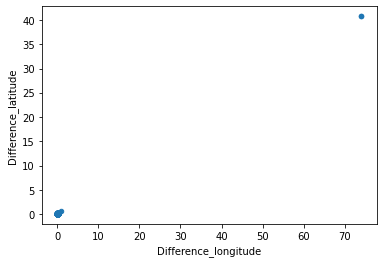

In [13]:
plot = train_data[:2000].plot.scatter('Difference_longitude', 'Difference_latitude')
#Maximum longitude look unreal->lies b/w 41,74

In [14]:
train_data=train_data[(train_data['Difference_longitude']<5.0)&(train_data['Difference_latitude']<5.0)]

In [15]:
#seperate pickup_time from pickup_datetime -> both for test & train dataset 
#Lst[ Initial : End : IndexJump ]
ls1=list(train_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
train_data['pickuptime']=ls1    



ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][11:-7:]
test_data['pickuptime']=ls1  

In [16]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51


In [17]:
#seperate weekday from pickup_datetime -> both for test & train dataset 
ls1=list(train_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i]) #Date & time
    ls1[i]=ls1[i].weekday() #The weekday() method is used to returns the day of the week (0 is Monday) 
train_data['Weekday']=ls1


ls1=list(test_data['pickup_datetime'])
for i in range(len(ls1)):
    ls1[i]=ls1[i][:-4:]
    ls1[i]=pd.Timestamp(ls1[i])
    ls1[i]=ls1[i].weekday()
test_data['Weekday']=ls1

In [18]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51,1


In [19]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Weekday
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,13:08,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,13:08,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,11:53,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,21:12,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,21:12,5


In [20]:
#we dont need pickup_datetime anymore
train_data.drop('pickup_datetime',inplace=True,axis=1)
test_data.drop('pickup_datetime',inplace=True,axis=1)

In [21]:
#replace weekdays which is int(0,7) ryt now with the days['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
train_data['Weekday'].replace(to_replace=[i for i in range(0,7)],
                            value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)
test_data['Weekday'].replace(to_replace=[i for i in range(0,7)],
                              value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                              inplace=True)

In [22]:
#get_dummies- Convert categorical variable into dummy/indicator variables.
#Dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect
train_one_hot=pd.get_dummies(train_data['Weekday'])
test_one_hot=pd.get_dummies(test_data['Weekday'])
train_data=pd.concat([train_data,train_one_hot],axis=1)
test_data=pd.concat([test_data,test_one_hot],axis=1)

In [23]:
#we dont need int weekdays anymore
train_data.drop('Weekday', axis = 1, inplace = True)
test_data.drop('Weekday', axis = 1, inplace = True)

In [24]:
#remove the colon from pickup_time column
ls1=list(train_data['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
train_data['pickuptime']=ls1


ls1=list(test_data['pickuptime'])
for i in range(len(ls1)):
    z=ls1[i].split(':')
    ls1[i]=int(z[0])*100+int(z[1])
test_data['pickuptime']=ls1

In [25]:
train_data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Difference_longitude,Difference_latitude,pickuptime,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726,0,1,0,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652,0,0,0,0,0,1,0
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35,0,0,0,0,1,0,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430,0,0,1,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751,0,0,0,0,0,1,0


In [26]:
#calculate/find distance using Haversine formula
R = 6373.0 #radius of earth in km
lat1 =np.asarray(np.radians(train_data['pickup_latitude']))
lon1 = np.asarray(np.radians(train_data['pickup_longitude']))
lat2 = np.asarray(np.radians(train_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_data['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train_data['Distance']=np.asarray(distance)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
 
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
test_data['Distance']=np.asarray(distance)*0.621



In [27]:
#creating_pickup_dropoff_distance
R = 6373.0
lat1 =np.asarray(np.radians(train_data['pickup_latitude']))
lon1 = np.asarray(np.radians(train_data['pickup_longitude']))
lat2 = np.asarray(np.radians(train_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_data['dropoff_longitude']))

lat3=np.zeros(len(train_data))+np.radians(40.6413111)
lon3=np.zeros(len(train_data))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_data['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_data['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_data['pickup_latitude']))
lon1 = np.asarray(np.radians(test_data['pickup_longitude']))
lat2 = np.asarray(np.radians(test_data['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_data['dropoff_longitude']))

lat3=np.zeros(len(test_data))+np.radians(40.6413111)
lon3=np.zeros(len(test_data))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_data['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
test_data['Dropoff_Distance_airport']=np.asarray(distance2)*0.621

In [28]:
#Approximation - 2 places after decimals
train_data['Distance']=np.round(train_data['Distance'],2)
train_data['Pickup_Distance_airport']=np.round(train_data['Pickup_Distance_airport'],2)
train_data['Dropoff_Distance_airport']=np.round(train_data['Dropoff_Distance_airport'],2)
test_data['Distance']=np.round(test_data['Distance'],2)
test_data['Pickup_Distance_airport']=np.round(test_data['Pickup_Distance_airport'],2)
test_data['Dropoff_Distance_airport']=np.round(test_data['Dropoff_Distance_airport'],2)


In [29]:
#dropping all unwanted columns
train_data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
test_data.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)


In [30]:
#Calculating the RMSE - root mean square error
train_data['Difference_longitude']=np.abs(train_data['Difference_longitude']-np.mean(train_data['Difference_longitude']))
train_data['Difference_longitude']=train_data['Difference_longitude']/np.var(train_data['Difference_longitude'])


In [31]:
train_data['Difference_latitude']=np.abs(train_data['Difference_latitude']-np.mean(train_data['Difference_latitude']))
train_data['Difference_latitude']=train_data['Difference_latitude']/np.var(train_data['Difference_latitude'])

In [32]:
test_data['Difference_longitude']=np.abs(test_data['Difference_longitude']-np.mean(test_data['Difference_longitude']))
test_data['Difference_longitude']=test_data['Difference_longitude']/np.var(test_data['Difference_longitude'])

test_data['Difference_latitude']=np.abs(test_data['Difference_latitude']-np.mean(test_data['Difference_latitude']))
test_data['Difference_latitude']=test_data['Difference_latitude']/np.var(test_data['Difference_latitude'])

In [33]:
train_data.shape

(9979187, 16)

In [34]:
test_data.shape

(9914, 15)

In [35]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['key','fare_amount'],axis=1)
y=train_data['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)

In [36]:
#Accuracy score
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.5676732492580333


In [37]:
#Approximation and Prediction
pred=np.round(lr.predict(test_data.drop('key',axis=1)),2)

In [38]:
#storing key and fareamount only into "result"
result=pd.DataFrame(data=pred,columns=['fare_amount'])
result['key']=test_data['key']
result=result[['key','fare_amount']]

result.set_index('key',inplace=True)

In [39]:
#Result stored in Submission.csv file
result.to_csv('Submission.csv')

## Final Result: linear regression accuracy is 56.77%